Let's compute $\chi^2$ vs $\beta$ using Pantheon data:

In [2]:
# import libraries:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
from getdist import plots
from getdist import MCSamples
import os
import emcee 
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython


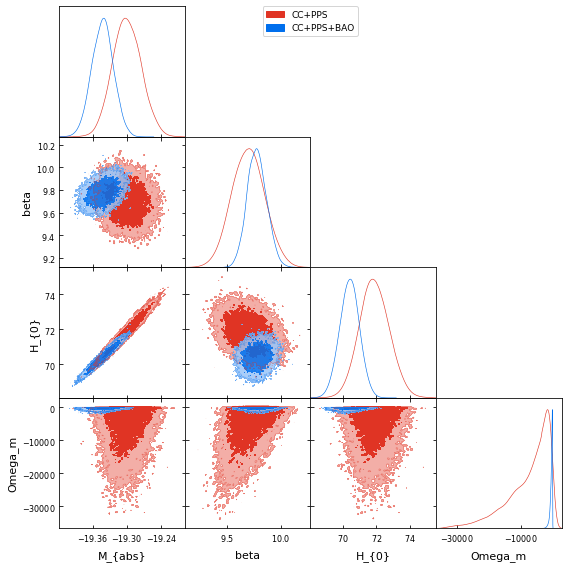

In [8]:
names_2 = ['M_{abs}','beta','H_{0}','Omega_m']
labels_2=names_2

filename_1 = '/home/mleize/Documents/Repos/GILA-output/L=0.85/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = '/home/mleize/Documents/Repos/GILA-output/L=0.85/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'
reader_1 = emcee.backends.HDFBackend(filename_1)
samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)

reader_2 = emcee.backends.HDFBackend(filename_2)
samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names_2)
samps_2 = MCSamples(samples = samples_2,names=names_2)

g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names_2, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.85.png')

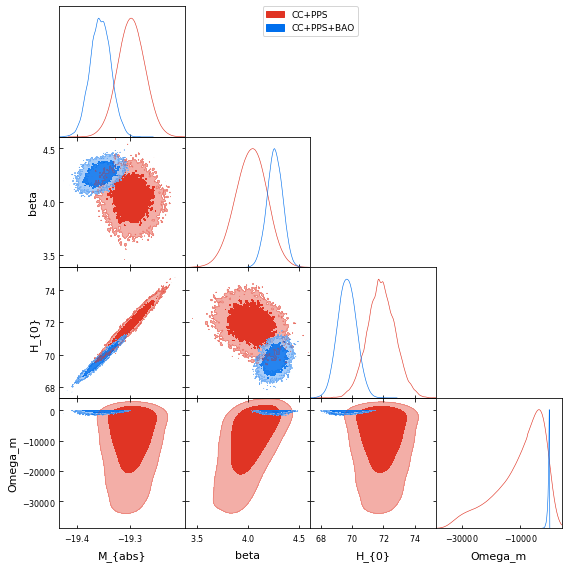

In [7]:
names_2 = ['M_{abs}','beta','H_{0}','Omega_m']
labels_2=names_2


filename_1 = '/home/mleize/Documents/Repos/GILA-output/L=0.90/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = '/home/mleize/Documents/Repos/GILA-output/L=0.90/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'
reader_1 = emcee.backends.HDFBackend(filename_1)
samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)

reader_2 = emcee.backends.HDFBackend(filename_2)
samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names_2)
samps_2 = MCSamples(samples = samples_2,names=names_2)
g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names_2, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.90.png')

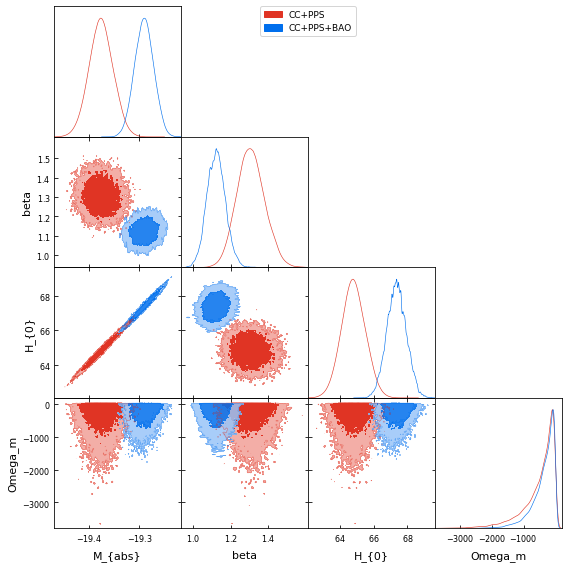

In [6]:
names_2 = ['M_{abs}','beta','H_{0}','Omega_m']

labels_2=names_2


filename_1 = '/home/mleize/Documents/Repos/GILA-output/L=1.00/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = '/home/mleize/Documents/Repos/GILA-output/L=1.00/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'
reader_1 = emcee.backends.HDFBackend(filename_1)
samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)

reader_2 = emcee.backends.HDFBackend(filename_2)
samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names_2)
samps_2 = MCSamples(samples = samples_2,names=names_2)
g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names_2, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=1.00.png')

Here we present the results with $\Omega^{\rm \Lambda CDM}_m$ 

In [ ]:
names_2 = ['M_{abs}','beta','H_{0}','Omega_m']
labels_2=names_2



filename_1 = '/home/mleize/Documents/Repos/GILA-output/L=0.85/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = '/home/mleize/Documents/Repos/GILA-output/L=0.85/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'

with np.load(filename_1 + '_deriv.npz') as data:
    ns = data['new_samples']


#reader_1 = emcee.backends.HDFBackend(filename_1)
#samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)
#reader_2 = emcee.backends.HDFBackend(filename_2)
#samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names_2)
samps_2 = MCSamples(samples = samples_2,names=names_2)

g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names_2, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.85.png')